In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import sklearn.linear_model

In [6]:
house_data =pd.read_csv('/content/drive/MyDrive/housing.csv')
house_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
house_data.info()

In [ ]:
house_data['total_bedrooms'].isna().sum()

207

In [8]:
house_data['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [9]:
house_data['total_bedrooms'].fillna(house_data['total_bedrooms'].mean(),inplace= True)

In [10]:
house_data['total_bedrooms'].isna().sum()

0

In [11]:
print(house_data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [12]:
# x =house_data
x=house_data.drop(['median_house_value'],axis=1)
y=house_data[['median_house_value']]

In [13]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [14]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [15]:
one_hot = pd.get_dummies(x['ocean_proximity'])
one_hot.head()
x = pd.concat([x, one_hot],axis = 1)
x.drop('ocean_proximity',axis = 1, inplace = True)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.9)

In [27]:
y_test.head()

,median_house_value
535,292700.0
7433,143800.0
3498,185800.0
10115,245000.0
17467,274300.0


In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
y_test_pred =reg.predict(x_test)


In [ ]:
reg = LinearRegression().fit(x_test,y_test)

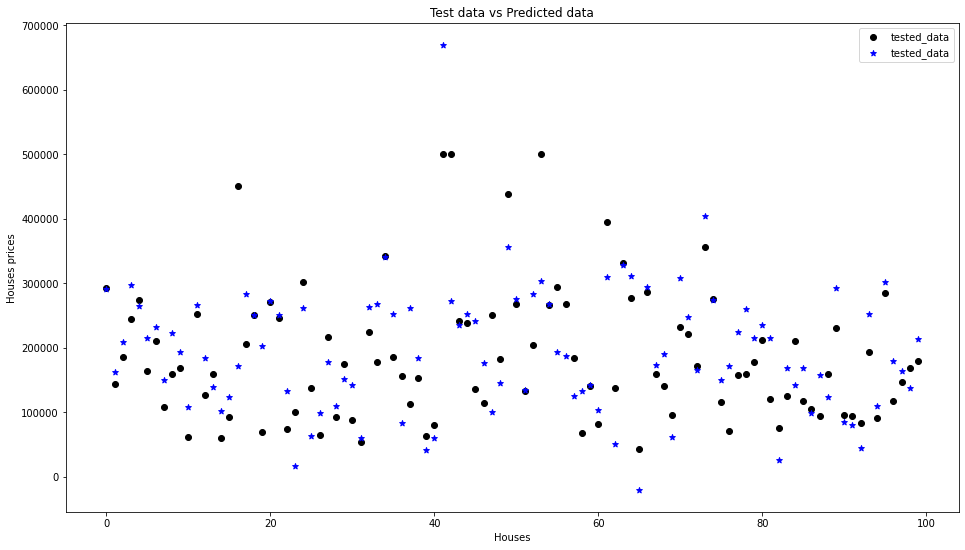

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.scatter(range(len(y_test[:100])),y_test[:100],color='black',label='tested_data')
plt.scatter(range(len(y_test_pred[:100])),y_test_pred[:100],color='blue',marker='*',label='tested_data')
plt.xlabel('Houses')
plt.ylabel('Houses prices')
plt.title('Test data vs Predicted data')
plt.legend()
plt.show()

In [30]:
check_y=y_test
type(check_y)
check_y['predicted_price']=y_test_pred

In [31]:
y_test['predicted_price'].shape

(2064,)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test['median_house_value'],y_test['predicted_price'])
rmse=np.sqrt(mse)
print(mse,rmse)
r2_score(y_test['median_house_value'],y_test['predicted_price'])


4512913943.099435 67178.22521546275


0.6487677504280367

In [33]:
y_pred= reg.predict([[-117.08,33.08,23.0,3000.0,601.0,1383.0,488.0,4.9844,0,0,0,1,0]])
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[255361.9388807]])

# New Section